In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [185]:
raw_data = "https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv"
    
df = pd.read_csv(raw_data)

In [186]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [187]:
df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [188]:
df.dtypes

25k           object
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

In [189]:
df.nunique()

25k           3245
age             61
name         16137
division      3698
10k           1459
gender           2
half          2761
official      5370
bib          16157
ctz             75
country         68
overall      16107
pace           362
state           65
30k           3862
5k             808
genderdiv     9812
20k           2644
35k           4539
city          4416
40k           5136
dtype: int64

In [190]:
df.iloc[413, :]

25k                           -
age                          32
name         Kutsukake, Kenichi
division                    269
10k                       36.90
gender                        M
half                      79.10
official                    162
bib                         498
ctz                         NaN
country                     JPN
overall                     346
pace                       6.18
state                       NaN
30k                      113.60
5k                        18.42
genderdiv                   325
20k                       74.98
35k                      133.23
city                    Ibaraki
40k                      153.13
Name: 413, dtype: object

In [191]:
df["25k"] = pd.to_numeric(df["25k"], errors="coerce")

In [192]:
df.dtypes

25k          float64
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

In [193]:
df["10k"] = pd.to_numeric(df["10k"], errors="coerce")

In [194]:
df[["30k", "5k", "20k", "35k", "40k"]] = df[["30k", "5k", "20k", "35k", "40k"]].apply(pd.to_numeric, errors="coerce")

#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
#df["5k"] = pd.to_numeric(df["5k"], errors="coerce")
#df["25k"] = pd.to_numeric(df["25k"], errors="coerce")

In [195]:
df.dtypes

25k          float64
age            int64
name          object
division       int64
10k          float64
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k          float64
5k           float64
genderdiv      int64
20k          float64
35k          float64
city          object
40k          float64
dtype: object

In [196]:
z = {"M": 1, "F": 2}

In [197]:

df["gender"] = df["gender"].map(z)



In [198]:
df["gender"].value_counts()

1    9680
2    6484
Name: gender, dtype: int64

In [199]:
df2 = df.select_dtypes(exclude="object")

In [200]:
X = df.select_dtypes(exclude="object")
X.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [201]:
X.isna().sum()

25k          23
age           0
division      0
10k          26
gender        0
official      0
overall       0
pace          0
30k          17
5k           66
genderdiv     0
20k          17
35k          21
40k          17
dtype: int64

In [202]:
X.shape

(16164, 14)

In [203]:
from sklearn.preprocessing import normalize

X = X.dropna()
X = normalize(X)

<h1><center>** ------k-Means-------**</center></h1>



In [204]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)


In [205]:
labels = kmeans.predict(X)
print(labels)

[4 4 4 ... 1 1 0]


In [206]:
kmeans.cluster_centers_

array([[1.35382991e-02, 4.10283052e-03, 1.02760197e-01, 5.36935873e-03,
        2.25467278e-04, 2.35463909e-02, 9.51385599e-01, 8.98988331e-04,
        1.64050490e-02, 2.69484599e-03, 2.60788493e-01, 1.07859521e-02,
        1.93525730e-02, 2.22728048e-02],
       [1.60036706e-02, 6.82031649e-03, 7.78486217e-02, 6.34778145e-03,
        1.43469601e-04, 2.80524940e-02, 7.83534712e-01, 1.07108156e-03,
        1.94015288e-02, 3.18343492e-03, 6.06505060e-01, 1.27539098e-02,
        2.29257433e-02, 2.64835063e-02],
       [3.26493809e-02, 1.00587719e-02, 4.11371369e-01, 1.30020640e-02,
        3.17695108e-04, 5.69033507e-02, 6.65663329e-01, 2.17285638e-03,
        3.94899278e-02, 6.52512311e-03, 6.05830249e-01, 2.60655868e-02,
        4.65516783e-02, 5.37432647e-02],
       [1.52094077e-01, 5.20291010e-02, 3.64673396e-01, 6.06424015e-02,
        1.62722482e-03, 2.62430796e-01, 5.50333553e-01, 1.00227096e-02,
        1.83555479e-01, 3.04019814e-02, 5.14978536e-01, 1.21603854e-01,
        2.156

In [207]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [208]:
print("Silhouette coefficient for kmeans: ", metrics.silhouette_score(X, labels, metric="euclidean"))

Silhouette coefficient for kmeans:  0.6340714311028537


<h1><center>** ------Meanshift-------**</center></h1>


In [209]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=.55, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_

In [210]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [211]:
ms.cluster_centers_

array([[1.37432119e-02, 5.06704626e-03, 1.10652657e-01, 5.44753875e-03,
        1.59376312e-04, 2.40969490e-02, 8.51622374e-01, 9.20019150e-04,
        1.66698280e-02, 2.73245885e-03, 4.59068829e-01, 1.09468110e-02,
        1.97051568e-02, 2.27590275e-02],
       [2.76920751e-01, 1.15472097e-01, 1.30585187e-01, 1.08436845e-01,
        3.80041477e-03, 4.84002290e-01, 1.98459070e-01, 1.84850902e-02,
        3.36449899e-01, 5.39055676e-02, 1.76382564e-01, 2.20645103e-01,
        3.97909297e-01, 4.56492802e-01]])

In [212]:
print("Silhouette coefficient for Meanshift: ", metrics.silhouette_score(X, labels, metric="euclidean"))

Silhouette coefficient for Meanshift:  0.6626669876299173


<h1><center>** ------Spectral Clustering-------**</center></h1>


In [213]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=4)
sc.fit(X)

labels = sc.labels_

labels


array([3, 3, 3, ..., 0, 0, 1])

In [214]:
print("Silhouette coefficient for Spectral Clustering: ", metrics.silhouette_score(X, labels, metric="euclidean"))

Silhouette coefficient for Spectral Clustering:  0.6317663052511915


## Analyzing Meanshift Clusters

In [215]:
df2.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [216]:
df2.shape

(16164, 14)

In [219]:
df2 = df2.dropna()

In [220]:
df2.shape

(16057, 14)

In [228]:
df2["cluster"] = ms.labels_

In [230]:
df2.tail()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster
16159,144.85,65,6,57.57,2,247.47,17014,9.45,174.75,28.50,6686,115.63,204.83,234.48,0
16160,133.32,64,258,52.80,1,229.72,13796,8.77,161.00,26.57,9024,106.38,189.82,217.88,0
16161,139.83,75,3,54.97,1,239.97,16083,9.17,168.82,27.48,9994,111.45,198.42,227.53,0
16162,135.38,80,1,53.13,1,233.90,14768,8.93,164.02,26.93,9434,107.85,192.80,221.42,0
16163,144.95,61,49,57.57,2,249.15,17144,9.52,175.82,28.93,6762,115.32,206.67,235.85,0


In [231]:
df2[df2["cluster"] == 0].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster
count,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.000000,15718.0
mean,118.943109,41.851826,1121.787886,47.025171,1.409658,209.488271,8609.316134,7.998083,144.478079,23.569084,4441.063939,94.638154,171.058805,197.820398,0.0
std,11.676090,10.312277,938.653021,4.497941,0.491786,22.033793,4955.842089,0.840509,14.486001,2.250789,2731.058229,9.164757,17.590688,20.723368,0.0
min,88.180000,18.000000,1.000000,33.580000,1.000000,160.480000,301.000000,6.130000,108.020000,16.420000,29.000000,69.450000,128.880000,150.800000,0.0
25%,109.680000,34.000000,389.000000,43.480000,1.000000,193.050000,4327.250000,7.370000,133.150000,21.850000,2162.250000,87.350000,157.472500,182.220000,0.0
50%,119.670000,42.000000,864.000000,47.330000,1.000000,209.900000,8430.500000,8.020000,145.220000,23.700000,4202.500000,95.200000,171.770000,198.470000,0.0
75%,127.530000,49.000000,1579.000000,50.350000,2.000000,225.550000,12759.750000,8.620000,155.080000,25.230000,6362.000000,101.430000,183.900000,212.930000,0.0
max,163.620000,80.000000,3834.000000,66.680000,2.000000,284.230000,17598.000000,10.850000,195.870000,33.220000,10648.000000,131.720000,229.500000,268.400000,0.0


In [232]:
df2[df2["cluster"] == 1].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.0
mean,84.440000,31.710914,85.958702,33.403127,1.026549,146.526667,130.460177,5.596313,102.225841,16.683776,119.079646,67.413540,120.456726,138.354838,1.0
std,11.371661,7.101060,73.674950,4.996101,0.160998,18.474352,93.841081,0.705316,13.296114,2.658382,87.343958,9.259524,15.139180,17.570089,0.0
min,48.320000,18.000000,1.000000,18.030000,1.000000,85.530000,1.000000,3.270000,59.450000,8.870000,1.000000,38.230000,71.180000,80.550000,1.0
25%,81.950000,26.000000,19.500000,32.370000,1.000000,142.940000,39.500000,5.460000,98.950000,16.175000,35.000000,65.535000,116.900000,134.935000,1.0
50%,88.280000,30.000000,65.000000,35.080000,1.000000,154.330000,124.000000,5.900000,106.570000,17.470000,111.000000,70.430000,125.950000,145.520000,1.0
75%,91.870000,35.500000,149.500000,36.660000,1.000000,157.940000,212.500000,6.030000,110.800000,18.420000,195.500000,73.445000,129.915000,149.315000,1.0
max,102.430000,55.000000,235.000000,38.600000,2.000000,202.400000,303.000000,7.720000,133.920000,21.620000,282.000000,79.630000,167.530000,189.250000,1.0


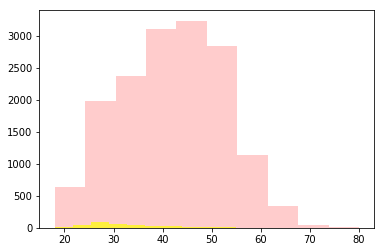

In [237]:
plt.hist(df2[df2["cluster"] == 0]["age"], color="red", alpha=.2)
plt.hist(df2[df2["cluster"] == 1]["age"], color="yellow", alpha=.7)
plt.show()

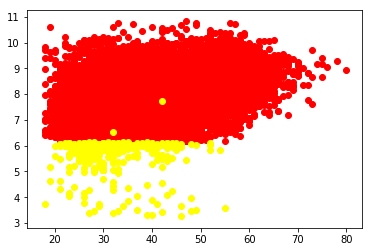

In [243]:
plt.scatter(df2[df2["cluster"] == 0]["age"], df2[df2["cluster"] == 0]["pace"], color="red")
plt.scatter(df2[df2["cluster"] == 1]["age"], df2[df2["cluster"] == 1]["pace"], color="yellow")
plt.show()

## Analyzing k-Means Clusters

In [244]:
df2["SCcluster"] = kmeans.labels_

In [245]:
df2.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster,SCcluster
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55,1,4
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77,1,4
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78,1,4
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43,1,4
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88,1,4


In [246]:
df2[df2["SCcluster"] == 0].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster,SCcluster
count,6439.000000,6439.000000,6439.000000,6439.000000,6439.0,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.0,6439.0
mean,125.630523,38.513434,1209.422581,49.648202,2.0,219.777399,10984.390123,8.390544,152.530419,24.891775,3403.955273,99.939795,180.316253,207.828567,0.0,0.0
std,8.778716,9.202383,1069.284293,3.390291,0.0,16.927855,4026.464581,0.645663,10.944425,1.705765,1990.048892,6.884629,13.401291,15.891816,0.0,0.0
min,95.320000,18.000000,1.000000,37.830000,2.0,166.620000,556.000000,6.370000,115.480000,18.850000,29.000000,75.930000,136.150000,157.300000,0.0,0.0
25%,120.240000,31.000000,351.000000,47.580000,2.0,208.680000,8085.500000,7.970000,145.640000,23.870000,1687.500000,95.750000,171.725000,197.480000,0.0,0.0
50%,125.820000,38.000000,844.000000,49.800000,2.0,219.750000,11208.000000,8.380000,152.820000,24.980000,3336.000000,100.100000,180.450000,207.880000,0.0,0.0
75%,131.820000,45.000000,1938.500000,51.920000,2.0,232.110000,14325.500000,8.870000,160.350000,26.000000,5088.500000,104.670000,190.070000,219.480000,0.0,0.0
max,163.620000,74.000000,3834.000000,66.680000,2.0,284.230000,17598.000000,10.850000,195.870000,33.220000,6950.000000,131.720000,227.200000,266.120000,0.0,0.0


In [247]:
df2[df2["SCcluster"] == 1].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster,SCcluster
count,6517.000000,6517.000000,6517.000000,6517.000000,6517.0,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.000000,6517.0,6517.0
mean,118.520813,49.269449,832.452969,46.777991,1.0,210.453020,8695.013043,8.034938,144.183333,23.425475,6267.626822,94.233139,171.114378,198.493116,0.0,1.0
std,10.141650,7.414469,717.886226,3.877959,0.0,20.696091,4682.111532,0.789549,12.740259,1.923726,2642.623584,7.938156,15.813719,19.267604,0.0,0.0
min,92.700000,18.000000,1.000000,35.530000,1.0,165.900000,525.000000,6.330000,111.900000,17.280000,497.000000,73.980000,132.530000,156.500000,0.0,1.0
25%,111.330000,44.000000,318.000000,44.020000,1.0,195.280000,4790.000000,7.450000,135.150000,22.080000,4251.000000,88.520000,159.780000,184.570000,0.0,1.0
50%,118.100000,49.000000,692.000000,46.620000,1.0,209.130000,8216.000000,7.980000,143.570000,23.370000,6468.000000,93.920000,170.370000,197.530000,0.0,1.0
75%,125.080000,54.000000,1158.000000,49.320000,1.0,224.320000,12458.000000,8.570000,152.570000,24.680000,8410.000000,99.400000,181.600000,211.370000,0.0,1.0
max,158.550000,80.000000,3775.000000,62.580000,1.0,282.200000,17597.000000,10.770000,191.000000,30.520000,10648.000000,123.180000,229.500000,268.400000,0.0,1.0


In [248]:
df2[df2["SCcluster"] == 2].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster,SCcluster
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.0,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2483.0,2483.0
mean,105.395030,32.140959,1745.554168,41.901426,1.0,185.362066,3142.307692,7.077684,127.713089,21.030834,2787.980266,84.051675,150.976013,174.892610,0.0,2.0
std,5.341033,5.069885,744.942643,2.226039,0.0,10.781229,1969.451898,0.411187,6.505258,1.170102,1588.923406,4.289099,7.955322,9.902194,0.0,0.0
min,88.880000,18.000000,465.000000,34.420000,1.0,167.280000,604.000000,6.380000,109.230000,17.020000,571.000000,70.180000,129.720000,155.980000,0.0,2.0
25%,101.900000,28.000000,1103.500000,40.520000,1.0,177.175000,1564.500000,6.770000,123.375000,20.320000,1472.500000,81.350000,145.470000,167.520000,0.0,2.0
50%,105.220000,33.000000,1735.000000,41.900000,1.0,183.670000,2648.000000,7.020000,127.200000,21.030000,2459.000000,84.000000,149.930000,173.230000,0.0,2.0
75%,108.570000,37.000000,2380.500000,43.170000,1.0,193.325000,4381.500000,7.380000,131.710000,21.730000,3931.500000,86.520000,156.060000,181.825000,0.0,2.0
max,126.930000,39.000000,3105.000000,54.930000,1.0,211.700000,8910.000000,8.080000,150.970000,30.720000,6817.000000,103.130000,175.380000,200.930000,0.0,2.0


In [249]:
df2[df2["SCcluster"] == 3].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster,SCcluster
count,420.000000,420.000000,420.000000,420.000000,420.0,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.0
mean,93.972595,31.854762,254.304762,37.456952,1.0,162.210905,374.178571,6.195000,113.419262,18.780476,351.190476,75.122548,133.268476,153.311000,0.335714,3.0
std,2.665803,6.770732,134.002574,1.266037,0.0,3.301318,128.213236,0.125764,2.918131,0.710351,123.698926,2.249258,3.027382,3.161438,0.472803,0.0
min,78.950000,19.000000,1.000000,31.600000,1.0,155.650000,153.000000,5.950000,96.180000,15.980000,138.000000,63.180000,119.300000,145.030000,0.000000,3.0
25%,92.370000,26.000000,156.750000,36.750000,1.0,159.400000,263.750000,6.080000,111.710000,18.420000,244.750000,73.727500,131.065000,150.622500,0.000000,3.0
50%,93.935000,31.000000,261.500000,37.470000,1.0,162.555000,372.500000,6.210000,113.370000,18.800000,350.500000,75.150000,133.350000,153.505000,0.000000,3.0
75%,95.950000,36.000000,367.250000,38.330000,1.0,165.030000,482.250000,6.300000,115.585000,19.270000,455.250000,76.740000,135.707500,155.957500,1.000000,3.0
max,99.730000,55.000000,476.000000,40.900000,1.0,167.520000,617.000000,6.400000,119.720000,20.730000,584.000000,80.150000,139.770000,159.320000,1.000000,3.0


In [250]:
df2[df2["SCcluster"] == 4].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,cluster,SCcluster
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.0
mean,79.159192,31.893939,39.469697,31.086818,1.045455,138.169646,60.929293,5.276919,96.096768,15.481515,54.363636,63.102071,113.546364,130.336162,1.0,4.0
std,12.283149,7.402419,34.311304,5.390173,0.208827,20.385785,46.097943,0.777927,14.445724,2.892746,42.142243,9.978764,16.588203,19.311569,0.0,0.0
min,48.320000,18.000000,1.000000,18.030000,1.000000,85.530000,1.000000,3.270000,59.450000,8.870000,1.000000,38.230000,71.180000,80.550000,1.0,4.0
25%,77.235000,26.000000,9.250000,30.880000,1.000000,132.500000,22.000000,5.070000,92.810000,15.572500,17.250000,61.520000,108.780000,124.770000,1.0,4.0
50%,84.385000,30.000000,29.000000,33.360000,1.000000,145.840000,46.500000,5.570000,102.090000,16.615000,42.000000,67.300000,120.375000,137.915000,1.0,4.0
75%,87.795000,36.000000,65.750000,34.815000,1.000000,152.365000,99.750000,5.820000,106.057500,17.415000,89.750000,70.120000,125.085000,143.915000,1.0,4.0
max,102.430000,55.000000,115.000000,37.330000,2.000000,202.400000,160.000000,7.720000,133.920000,21.620000,144.000000,79.630000,167.530000,189.250000,1.0,4.0


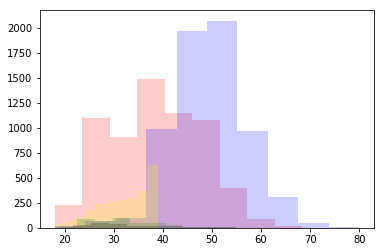

In [253]:
plt.hist(df2[df2["SCcluster"] == 0]["age"], color="red", alpha=.2)
plt.hist(df2[df2["SCcluster"] == 1]["age"], color="blue", alpha=.2)
plt.hist(df2[df2["SCcluster"] == 2]["age"], color="yellow", alpha=.2)
plt.hist(df2[df2["SCcluster"] == 3]["age"], color="green", alpha=.2)
plt.hist(df2[df2["SCcluster"] == 4]["age"], color="black", alpha=.2)
plt.show()

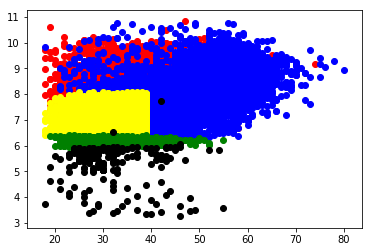

In [254]:
plt.scatter(df2[df2["SCcluster"] == 0]["age"], df2[df2["SCcluster"] == 0]["pace"], color="red")
plt.scatter(df2[df2["SCcluster"] == 1]["age"], df2[df2["SCcluster"] == 1]["pace"], color="blue")
plt.scatter(df2[df2["SCcluster"] == 2]["age"], df2[df2["SCcluster"] == 2]["pace"], color="yellow")
plt.scatter(df2[df2["SCcluster"] == 3]["age"], df2[df2["SCcluster"] == 3]["pace"], color="green")
plt.scatter(df2[df2["SCcluster"] == 4]["age"], df2[df2["SCcluster"] == 4]["pace"], color="black")
plt.show()

In [268]:
g = {1: "Male", 2: "Female"}

df2["gender"] = df2["gender"].map(g)

<BarContainer object of 2 artists>

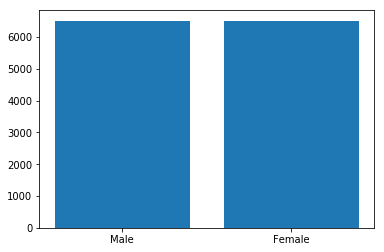

In [272]:
plt.bar(x=df2["gender"].unique(), height=df2[df2["SCcluster"] == 1]["gender"].value_counts())

In [276]:
df2[df2["SCcluster"] == 4]["gender"].value_counts()

Male      189
Female      9
Name: gender, dtype: int64